In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG19, ResNet152, DenseNet121, NASNetMobile, EfficientNetB0
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## VGG -19

In [4]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
hist = model.fit(x_train, y_train, epochs=8, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/8
1563/1563 [==============================] - 28s 14ms/step - loss: 1.4485 - accuracy: 0.4902 - val_loss: 1.3115 - val_accuracy: 0.5385
Epoch 2/8
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2657 - accuracy: 0.5567 - val_loss: 1.2553 - val_accuracy: 0.5568
Epoch 3/8
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2124 - accuracy: 0.5750 - val_loss: 1.2340 - val_accuracy: 0.5694
Epoch 4/8
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1816 - accuracy: 0.5847 - val_loss: 1.2285 - val_accuracy: 0.5699
Epoch 5/8
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1574 - accuracy: 0.5935 - val_loss: 1.2134 - val_accuracy: 0.5691
Epoch 6/8
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1378 - accuracy: 0.6008 - val_loss: 1.1817 - val_accuracy: 0.5838
Epoch 7/8
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1203 - accuracy: 0.6050 - val_loss: 1.2166 - val_ac

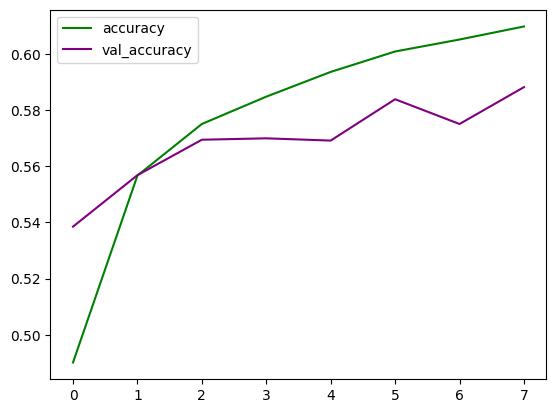

In [7]:
plt.plot(hist.history['accuracy'], label='accuracy',color="green")
plt.plot(hist.history['val_accuracy'], label='val_accuracy',color="purple")
plt.legend()

313/313 [==============================] - 3s 9ms/step


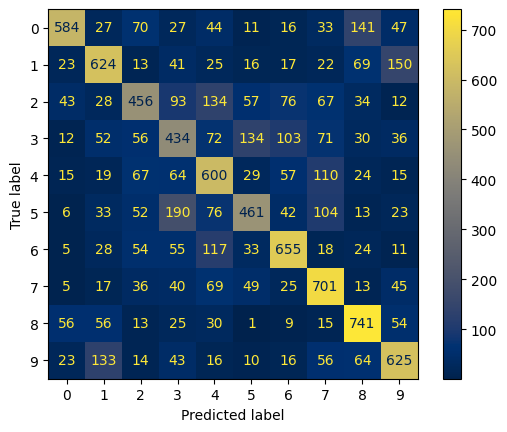

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
cf = ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap = plt.cm.cividis)

## Resnet152

In [10]:
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
hist = model.fit(x_train, y_train, epochs=8, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/8
1563/1563 [==============================] - 50s 28ms/step - loss: 2.1981 - accuracy: 0.1846 - val_loss: 2.1084 - val_accuracy: 0.2380
Epoch 2/8
1563/1563 [==============================] - 41s 26ms/step - loss: 2.0820 - accuracy: 0.2437 - val_loss: 2.0567 - val_accuracy: 0.2499
Epoch 3/8
1563/1563 [==============================] - 41s 26ms/step - loss: 2.0390 - accuracy: 0.2590 - val_loss: 2.0193 - val_accuracy: 0.2703
Epoch 4/8
1563/1563 [==============================] - 44s 28ms/step - loss: 2.0122 - accuracy: 0.2730 - val_loss: 1.9864 - val_accuracy: 0.2843
Epoch 5/8
1563/1563 [==============================] - 47s 30ms/step - loss: 1.9900 - accuracy: 0.2824 - val_loss: 1.9915 - val_accuracy: 0.2795
Epoch 6/8
1563/1563 [==============================] - 47s 30ms/step - loss: 1.9710 - accuracy: 0.2932 - val_loss: 1.9760 - val_accuracy: 0.2841
Epoch 7/8
1563/1563 [==============================] - 46s 29ms/step - loss: 1.9539 - accuracy: 0.2983 - val_loss: 1.9423 - val_ac

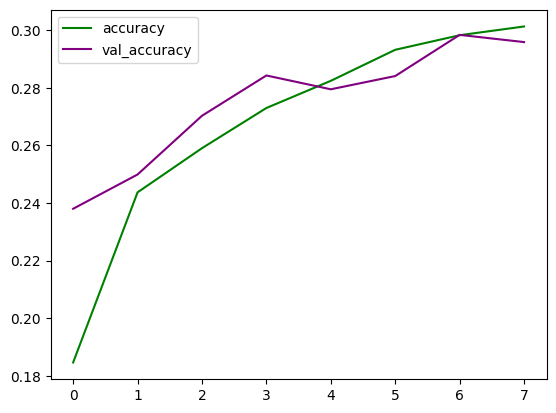

In [14]:
plt.plot(hist.history['accuracy'], label='accuracy',color="green")
plt.plot(hist.history['val_accuracy'], label='val_accuracy',color="purple")
plt.legend()

313/313 [==============================] - 8s 20ms/step


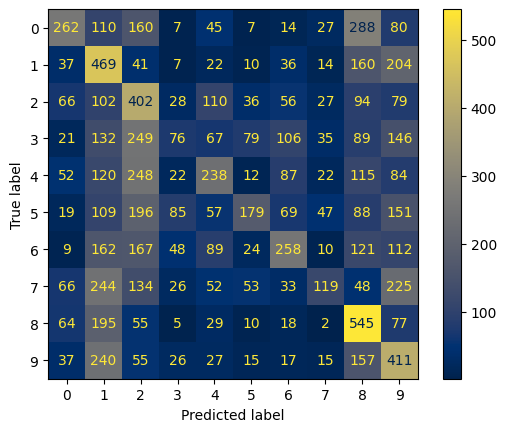

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
cf = ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap = plt.cm.cividis)

## DenseNet121

In [22]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

29084464/29084464 [==============================] - 11s 0us/step


In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
hist = model.fit(x_train, y_train, epochs=8, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/8
1563/1563 [==============================] - 40s 23ms/step - loss: 1.2568 - accuracy: 0.5629 - val_loss: 1.1080 - val_accuracy: 0.6136
Epoch 2/8
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0617 - accuracy: 0.6274 - val_loss: 1.0993 - val_accuracy: 0.6173
Epoch 3/8
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0044 - accuracy: 0.6462 - val_loss: 1.0406 - val_accuracy: 0.6413
Epoch 4/8
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9676 - accuracy: 0.6606 - val_loss: 1.0470 - val_accuracy: 0.6389
Epoch 5/8
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9348 - accuracy: 0.6718 - val_loss: 1.0365 - val_accuracy: 0.6437
Epoch 6/8
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9111 - accuracy: 0.6796 - val_loss: 1.0344 - val_accuracy: 0.6467
Epoch 7/8
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8858 - accuracy: 0.6877 - val_loss: 1.0304 - val_ac

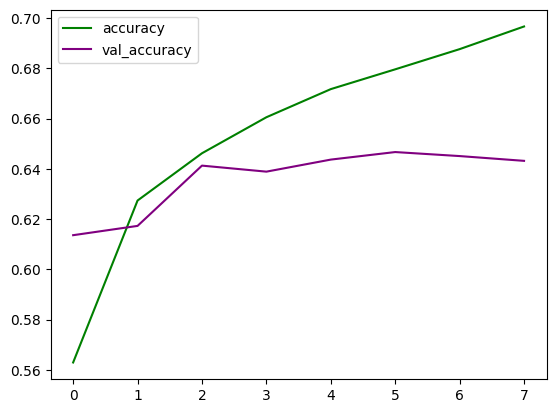

In [25]:
plt.plot(hist.history['accuracy'], label='accuracy',color="green")
plt.plot(hist.history['val_accuracy'], label='val_accuracy',color="purple")
plt.legend()

313/313 [==============================] - 6s 15ms/step


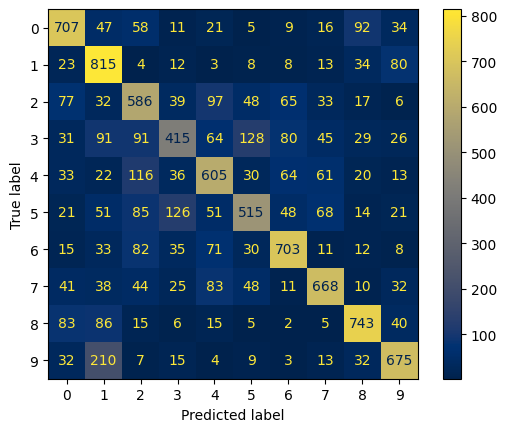

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
cf = ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap = plt.cm.cividis)

## NasNetMobile

In [29]:
base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
hist = model.fit(x_train, y_train, epochs=8, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/8
1563/1563 [==============================] - 48s 26ms/step - loss: 1.7540 - accuracy: 0.3794 - val_loss: 1.6335 - val_accuracy: 0.4171
Epoch 2/8
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5906 - accuracy: 0.4377 - val_loss: 1.6035 - val_accuracy: 0.4339
Epoch 3/8
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5399 - accuracy: 0.4529 - val_loss: 1.6024 - val_accuracy: 0.4376
Epoch 4/8
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5046 - accuracy: 0.4653 - val_loss: 1.6012 - val_accuracy: 0.4410
Epoch 5/8
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4729 - accuracy: 0.4793 - val_loss: 1.6139 - val_accuracy: 0.4354
Epoch 6/8
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4489 - accuracy: 0.4846 - val_loss: 1.6256 - val_accuracy: 0.4339
Epoch 7/8
1563/1563 [==============================] - 43s 28ms/step - loss: 1.4255 - accuracy: 0.4935 - val_loss: 1.6302 - val_ac

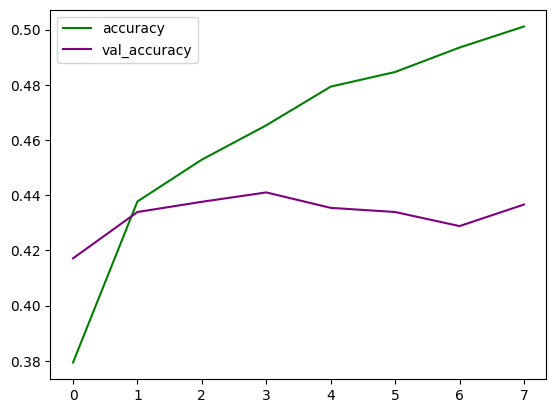

In [32]:
plt.plot(hist.history['accuracy'], label='accuracy',color="green")
plt.plot(hist.history['val_accuracy'], label='val_accuracy',color="purple")
plt.legend()

313/313 [==============================] - 9s 20ms/step


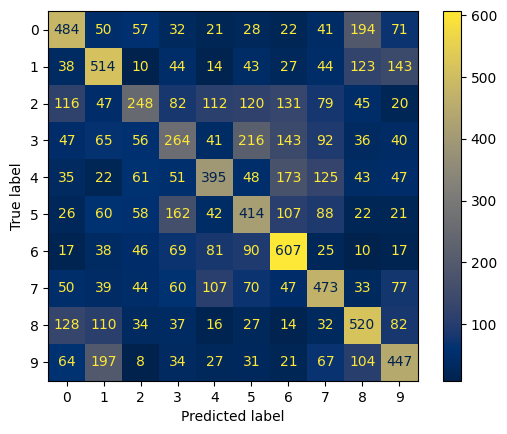

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test)
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
cf = ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap = plt.cm.cividis)

## EfficientNetB0

In [41]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
hist = model.fit(x_train, y_train, epochs=8, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/8
1563/1563 [==============================] - 24s 13ms/step - loss: 2.3034 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/8
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/8
1563/1563 [==============================] - 18s 12ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/8
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/8
1563/1563 [==============================] - 18s 12ms/step - loss: 2.3028 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/8
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/8
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 - val_ac

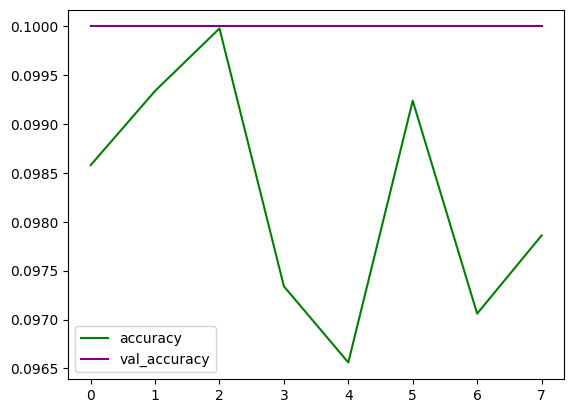

In [44]:
plt.plot(hist.history['accuracy'], label='accuracy',color="green")
plt.plot(hist.history['val_accuracy'], label='val_accuracy',color="purple")
plt.legend()

313/313 [==============================] - 3s 8ms/step


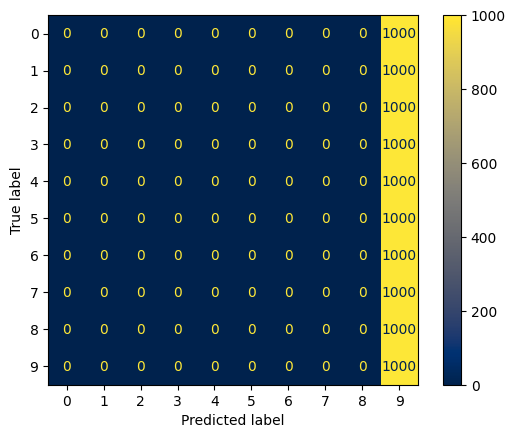

In [45]:
test_loss, test_acc = model.evaluate(x_test, y_test)
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
cf = ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap = plt.cm.cividis)